# Experiments for change detection

## 1 Processing p-values

### 1.1 Simplified Sleepy Jumper (SSJ)

This is an extremely simple version, with a primitive symmetric family of linear calibrators.

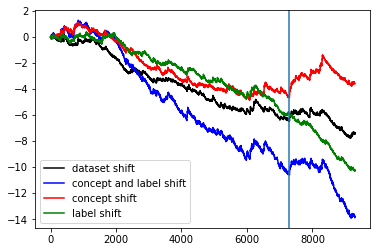

Final blue value: 1.700478920983209e-14


In [7]:
# What I am drawing:
seed = ""  # choose "" (for seed 0), "permuted/" (for seed 0 permuted), "seed_1/", "seed_2/", etc. (folder)
distance = "t9_"  # choose "" (for Euclidean or supercrazy), "t6_", or "t9_"
conf_measure = "nearest"  # conformity measure; choose "ratio", "ratio2", "same", "other", or "nearest"

import numpy as np
import matplotlib.pyplot as plt

# Processing p1 (direct)
p = np.loadtxt("C:/DnB/Work/R/Papers/OCM/CD/Python/p/"+seed+distance+"p1_"+conf_measure+".txt")

N = p.size  # 9298, the total number of observations
# N = 1000

Jrate = 0.1  # the jumping rate; in the book: 0.001; canonical: 0.01
APrate = 0.1   # the switching rate between active and passive; in the book and canonical: 0.01

# The quadratic calibrator:
def quad_cal(p,a,b):
  return 1 - b/12 + a*(p-0.5) + b*(p-0.5)**2

# My family of calibrators:
Ncal = 2  # the number of calibrators
def my_cal(p,k):
  if k==0:
    return quad_cal(p,1,0)
  if k==1:
    return quad_cal(p,-1,0)
  if k==2:
    return quad_cal(p,-1,1)
  if k==3:
    return quad_cal(p,1,-1)
  else:
    print("my_cal failure")

# Processing p1
MartPass = np.zeros((Ncal,N)) # the total capital of passive martingales
MartAct = np.zeros((Ncal,N))  # the total capital of active martingales
MartActJ = np.zeros((Ncal,N)) # the total capital of active martingales after jumping
mart = np.zeros((Ncal,N))     # the total capital of passive and active martingales

MartPass[:,0] = 1/Ncal  # the uniform initial distrobution; should be MartPass unless APrate = 0
mart[:,0] = 1/Ncal      # the initial values are equal
# print(mart[:,0])
for i in range(1,N):
  # Jumps mixing starts
  ActCapital = np.sum(MartAct[:,i-1])
  MartActJ[:,i] = (1-Jrate)*MartAct[:,i-1] + (Jrate/Ncal)*ActCapital
  # Jumps mixing ends
  # StartStop mixing starts
  MartAct[:,i] = (1-APrate)*MartActJ[:,i] + APrate*MartPass[:,i-1]
  MartPass[:,i] = (1-APrate)*MartPass[:,i-1] + APrate*MartActJ[:,i]
  # StartStop mixing ends
  for k in range(Ncal):
    MartAct[k,i] = MartAct[k,i] * my_cal(p[i],k)
  mart[:,i] = MartAct[:,i] + MartPass[:,i]
martingale1 = np.sum(mart,axis=0)

# Processing p2 (concept)
p = np.loadtxt("C:/DnB/Work/R/Papers/OCM/CD/Python/p/"+seed+distance+"p2_"+conf_measure+".txt")
MartPass = np.zeros((Ncal,N)) # the total capital of passive martingales
MartAct = np.zeros((Ncal,N))  # the total capital of active martingales
MartActJ = np.zeros((Ncal,N)) # the total capital of active martingales after jumping
mart = np.zeros((Ncal,N))     # the total capital of passive and active martingales

MartPass[:,0] = 1/Ncal   # the initial distribution is uniform; should be MartPass unless APrate = 0
mart[:,0] = 1/Ncal       # the initial values are equal
for i in range(1,N):
  # Jumps mixing starts
  ActCapital = np.sum(MartAct[:,i-1])
  MartActJ[:,i] = (1-Jrate)*MartAct[:,i-1] + (Jrate/Ncal)*ActCapital
  # Jumps mixing ends
  # StartStop mixing starts
  MartAct[:,i] = (1-APrate)*MartActJ[:,i] + APrate*MartPass[:,i-1]
  MartPass[:,i] = (1-APrate)*MartPass[:,i-1] + APrate*MartActJ[:,i]
  # StartStop mixing ends
  for k in range(Ncal):
    MartAct[k,i] = MartAct[k,i] * my_cal(p[i],k)
  mart[:,i] = MartAct[:,i] + MartPass[:,i]
martingale2 = np.sum(mart,axis=0)

# Processing p3 (label)
p = np.loadtxt("C:/DnB/Work/R/Papers/OCM/CD/Python/p/"+seed+distance+"p3_"+conf_measure+".txt")
MartPass = np.zeros((Ncal,N)) # the total capital of passive martingales
MartAct = np.zeros((Ncal,N))  # the total capital of active martingales
MartActJ = np.zeros((Ncal,N)) # the total capital of active martingales after jumping
mart = np.zeros((Ncal,N))     # the total capital of passive and active martingales

MartPass[:,0] = 1/Ncal  # the initial distribuition is uniform; should be MartPass unless APrate = 0
mart[:,0] = 1/Ncal   # the initial values are equal
for i in range(1,N):
  # Jumps mixing starts
  ActCapital = np.sum(MartAct[:,i-1])
  MartActJ[:,i] = (1-Jrate)*MartAct[:,i-1] + (Jrate/Ncal)*ActCapital
  # Jumps mixing ends
  # StartStop mixing starts
  MartAct[:,i] = (1-APrate)*MartActJ[:,i] + APrate*MartPass[:,i-1]
  MartPass[:,i] = (1-APrate)*MartPass[:,i-1] + APrate*MartActJ[:,i]
  # StartStop mixing ends
  for k in range(Ncal):
    MartAct[k,i] = MartAct[k,i] * my_cal(p[i],k)
  mart[:,i] = MartAct[:,i] + MartPass[:,i]
martingale3 = np.sum(mart,axis=0)

plt.plot(np.log10(martingale1),c='k',label='dataset shift')
plt.plot(np.log10(martingale2)+np.log10(martingale3),c='b',label='concept and label shift')
plt.plot(np.log10(martingale2),c='r',label='concept shift')
plt.plot(np.log10(martingale3),c='g',label='label shift')
plt.axvline(x=7291)  # 7291 is the size of the training set
plt.legend(loc='best')
plt.savefig(distance+"sSJ_all_"+conf_measure+".pdf", bbox_inches='tight')
plt.show()

print("Final blue value:", martingale2[N-1] * martingale3[N-1])

## 2 Sandbox

In [4]:
USPS = np.loadtxt("C:/DnB/Work/R/Data/MachineLearning/USPS/USPS.txt")

In [9]:
rg = np.random.default_rng(0)     # key parameter; setting the seed for reproducibility [default 0]
USPS1 = np.loadtxt("C:/DnB/Work/R/Data/MachineLearning/USPS/USPS.train",skiprows=3)
rg.shuffle(USPS1)     # permute the training set in USPS
N1 = USPS1.shape[0]   # reading the data set ends here; N = 9298
USPS2 = np.loadtxt("C:/DnB/Work/R/Data/MachineLearning/USPS/USPS.test",skiprows=3)
rg.shuffle(USPS2)     # permute the training set in USPS
N2 = USPS2.shape[0]   # reading the data set ends here; N = 9298
USPS3 = np.concatenate((USPS1,USPS2))  # the full dataset
N = N1+N2   # size

In [11]:
USPS==USPS3

array([[ True,  True,  True, ...,  True,  True, False],
       [ True,  True, False, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True, False],
       ...,
       [ True,  True, False, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True, False, ...,  True,  True, False]])